In [1]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import math
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import scvelo as scv
import unitvelo as utv
import tensorflow as tf
import tf_keras
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


(Running UniTVelo 0.2.5.2)
2024-11-07 01:34:50


2024-11-07 09:34:53.494012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 09:34:53.821905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 09:34:53.822007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


------> Manully Specified Parameters <------
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Filtered out 72 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
Extracted 1928 highly variable genes.
Computing moments for 1928 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities


/home/liyr/miniconda3/envs/unitevelo/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of velocity genes 927 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 810 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 809 (Criterion: genes have reads in more than 5% of total cells)
Using GPU card: 0


Loss (Total): 1339.420, (Spliced): 597.163, (Unspliced): 742.257: 100%|▉| 11998/

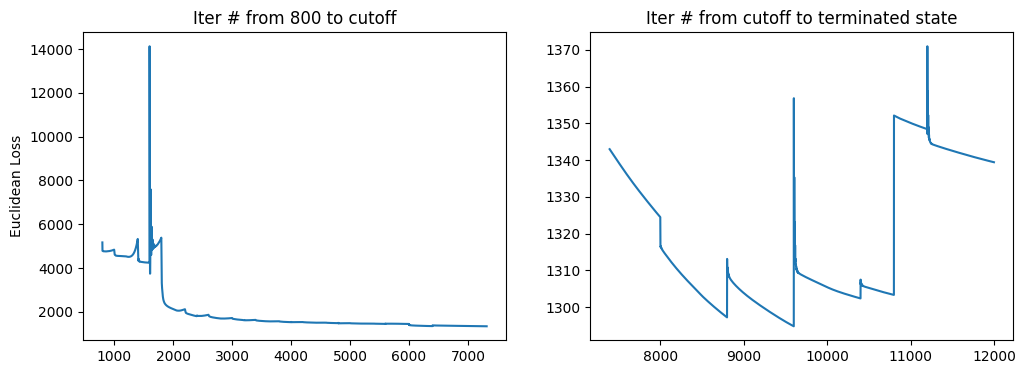

Loss (Total): 1339.420, (Spliced): 597.163, (Unspliced): 742.257: 100%|▉| 11999/

Total loss 1294.749, vgene loss 1339.420


  0%|          | 0/1720 [00:00<?, ?cells/s]

/home/liyr/miniconda3/envs/unitevelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/liyr/miniconda3/envs/unitevelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/liyr/miniconda3/envs/unitevelo/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/home/liyr/miniconda3/envs/unitevelo/lib/python3.9/site

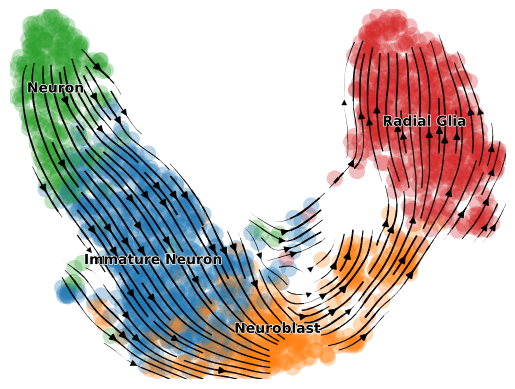

In [2]:
velo_config = utv.config.Configuration()
label = "clusters"

adata = utv.run_model('/home/liyr/hpz/real_data/Forebrain.h5ad', label, config_file=velo_config)
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='')

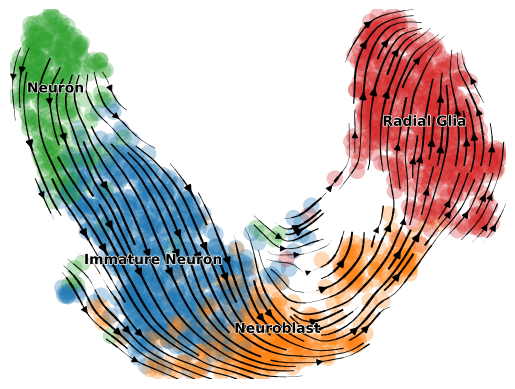

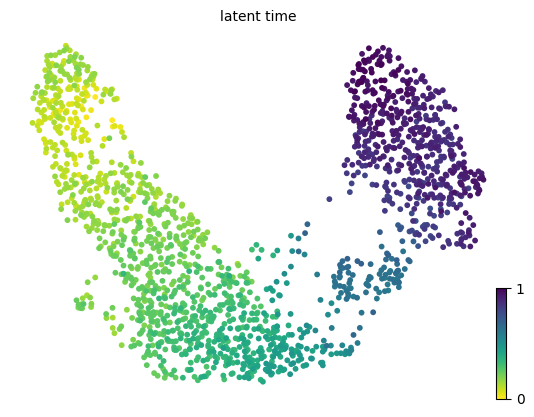

In [2]:
adata2 = scv.read("/home/liyr/hpz/real_data_graph/Forebrain/UniTvelo.h5ad")
scv.pl.velocity_embedding_stream(adata2, color=adata2.uns['label'], dpi=100, title='')
#scv.tl.latent_time(adata2, min_likelihood=None)
scv.pl.scatter(adata2, color='latent_time')

In [3]:
subvar = adata2.var.loc[adata2.var['velocity_genes'] == True]
sub = adata2[:, subvar.index]

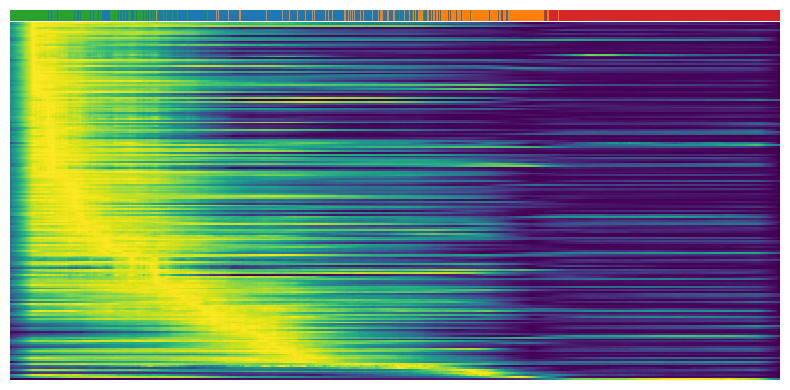

In [4]:

gene1 = sub.var.loc[sub.var['fit_t'] < 0.05].index # repression gene
scv.pl.heatmap(
    sub, var_names=gene1, sortby='latent_time', yticklabels=False,
    col_color='clusters', n_convolve=100)

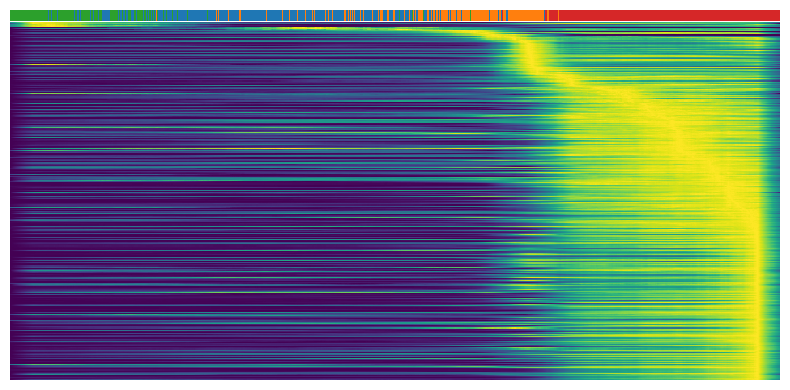

In [5]:
gene2 = sub.var.loc[sub.var['fit_t'] > 0.95].index # repression gene
scv.pl.heatmap(
    sub, var_names=gene2, sortby='latent_time', yticklabels=False,
    col_color='clusters', n_convolve=100)

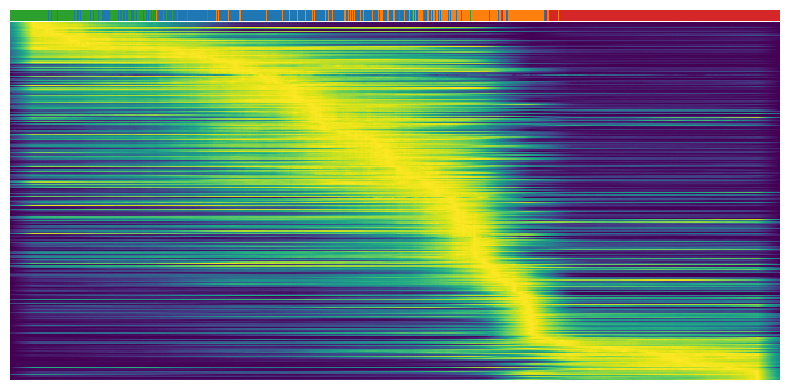

In [6]:
gene3 = sub.var.loc[(sub.var['fit_t'] < 0.95) & (sub.var['fit_t'] > 0.05)].index # repression gene
scv.pl.heatmap(
    sub, var_names=gene3, sortby='latent_time', yticklabels=False,
    col_color='clusters', n_convolve=100)

In [7]:
len0 = max([len(gene1),len(gene2),len(gene3)])
gene1 = list(gene1) + [ np.nan for i in range(len0-len(list(gene1)))]
gene2 = list(gene2) + [ np.nan for i in range(len0-len(list(gene2)))]
gene3 = list(gene3) + [ np.nan for i in range(len0-len(list(gene3)))]
df_gene = pd.DataFrame([gene1,gene2,gene3]).T
df_gene.columns = ["fit_t<0.05","fit_t>0.95","0.05<fit_t<0.95"]

In [8]:
df_gene.to_csv("/home/liyr/zxc/top_like_genes/res/unitvelo.csv")

In [9]:
sub.var['fit_t'].to_csv("/home/liyr/zxc/top_like_genes/res/unitvelo_fit_t.csv")